<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_28_NeuralNetwork_ActivationFunctionsMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
class Net_Sigmoid(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net_Sigmoid,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    z_pred = self.l2(out1)
    return z_pred


In [26]:
class Net_Tanh(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net_Tanh,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.tanh = nn.Tanh()

  def forward(self,x):
    out1 = self.tanh(self.l1(x))
    z_pred = self.l2(out1)
    return z_pred

In [27]:
class Net_ReLU(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net_ReLU,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.relu = nn.ReLU()

  def forward(self,x):
    out1 = self.relu(self.l1(x))
    z_pred = self.l2(out1)
    return z_pred

In [32]:
def train_model(model,optimizer,criterion,train_loader,validation_loader,EPOCHS=100):
  metrics = {'training_loss':[],'validation_accuracy':[]}
  for epoch in range(EPOCHS):
    for x,y in train_loader:
      z = model(x.view(-1,1*28*28))
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      metrics['training_loss'].append(loss.item())

    correct = 0
    for x_val,y_val in validation_loader:
      z = model(x_val.view(-1,1*28*28))
      _,y_pred = torch.max(z,1)
      correct += (y_pred == y_val).sum().item()
    accuracy = ( 100 * correct ) / len(validation_dataset)
    metrics['validation_accuracy'].append(accuracy)
  return metrics

In [33]:
input_dim = 1*28*28
hidden_dim = 100
output_dim = 10
learning_rate = 0.01 
criterion = nn.CrossEntropyLoss()

In [34]:
train_dataset = datasets.MNIST(root = '../mnist_data',train = True,download=True,transform = transforms.ToTensor())
validation_dataset = datasets.MNIST(root = '../mnist_data',train = False,download=True,transform = transforms.ToTensor())
train_loader = DataLoader(dataset = train_dataset,shuffle=True,batch_size =2000)
validation_loader = DataLoader(dataset = validation_dataset,shuffle = False,batch_size = 5000 )

In [36]:
model_sigmoid = Net_Sigmoid(input_dim,hidden_dim,output_dim)
optimizer = optim.SGD(model_sigmoid.parameters(),learning_rate)
training_result_sigmoid = train_model(model_sigmoid,optimizer,criterion,train_loader,validation_loader,EPOCHS=10)

In [38]:
model_tanh = Net_Tanh(input_dim,hidden_dim,output_dim)
optimizer = optim.SGD(model_tanh.parameters(),learning_rate)
training_result_tanh = train_model(model_tanh,optimizer,criterion,train_loader,validation_loader,EPOCHS=10)

In [40]:
model_relu = Net_ReLU(input_dim,hidden_dim,output_dim)
optimizer = optim.SGD(model_relu.parameters(),learning_rate)
training_result_relu = train_model(model_relu,optimizer,criterion,train_loader,validation_loader,EPOCHS=10)

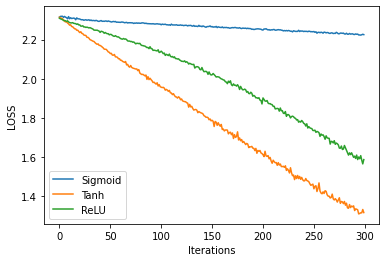

In [41]:
plt.plot(training_result_sigmoid['training_loss'],label = 'Sigmoid')
plt.plot(training_result_tanh['training_loss'],label = 'Tanh')
plt.plot(training_result_relu['training_loss'],label = 'ReLU')
plt.xlabel('Iterations')
plt.ylabel('LOSS')
plt.legend()
plt.show()

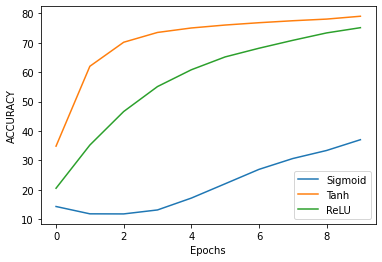

In [42]:
plt.plot(training_result_sigmoid['validation_accuracy'],label = 'Sigmoid')
plt.plot(training_result_tanh['validation_accuracy'],label = 'Tanh')
plt.plot(training_result_relu['validation_accuracy'],label = 'ReLU')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()